In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv("bank_notes.csv")
TARGET = "Target"
df

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [3]:
df.isna().sum().sum() + df.isnull().sum().sum()

0

In [4]:
df.duplicated().sum()

24

In [5]:
def get_X_y(df):
    return df.drop(columns=[TARGET]), df[TARGET]

In [6]:
def preprocess(df):
    df = df.copy(deep=True)

    # Dropping duplicates that we checked for
    df.drop_duplicates(inplace=True)
    
    # Normalization
    X, y = get_X_y(df)
    df = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)
    df[TARGET] = y

    return df

def pca_transform_df(df, pca: PCA):
    df = df.copy(deep=True)

    X, y = get_X_y(df)
    transformed_X = pca.transform(X)

    df = pd.DataFrame(transformed_X, columns=["PC1", "PC2"], index=X.index)
    df[TARGET] = y

    return df

In [7]:
df = preprocess(df)
pca = PCA(n_components=2, random_state=42).fit(get_X_y(df)[0])
df = pca_transform_df(df, pca)

In [9]:
X, y = get_X_y(df)
NO_OF_CLUSTERS = len(y.unique())

In [10]:
agglomerative = AgglomerativeClustering(n_clusters=None, distance_threshold=0)
y_pred = agglomerative.fit_predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       738
           1       1.00      0.00      0.00       610
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/home/jass/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jass/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jass/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


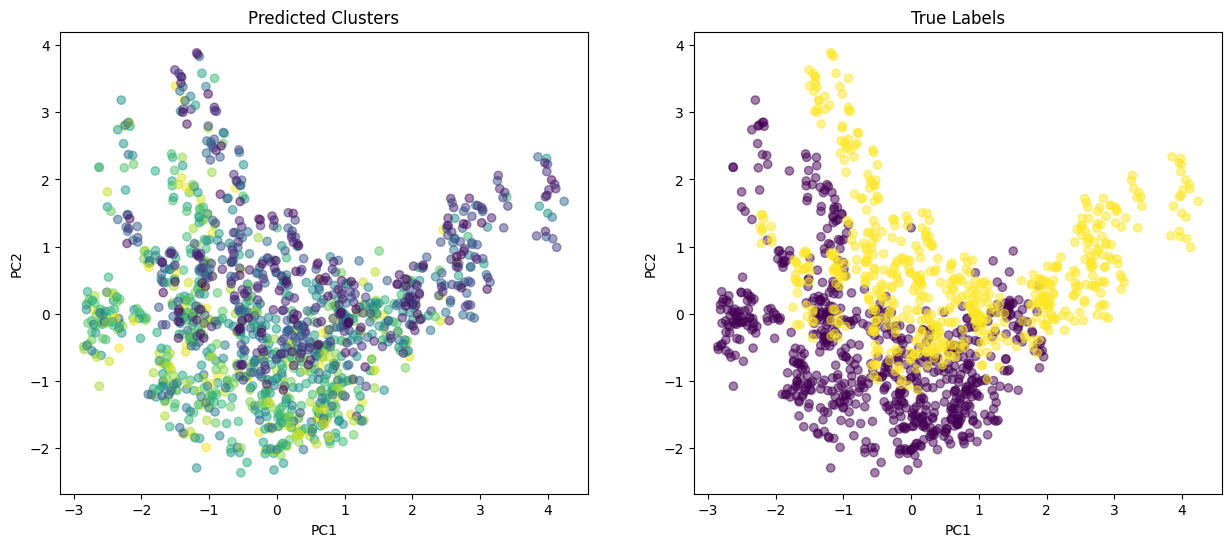

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Plot the predicted clusters
ax[0].scatter(X["PC1"], X["PC2"], c=y_pred, cmap='viridis', alpha=0.5)
ax[0].set_title('Predicted Clusters')
ax[0].set_xlabel('PC1')
ax[0].set_ylabel('PC2')

# Plot the true labels
ax[1].scatter(X["PC1"], X["PC2"], c=y, cmap='viridis', alpha=0.5)
ax[1].set_title('True Labels')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')

plt.show()

In [12]:
def plot_dendrogram(model: AgglomerativeClustering, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

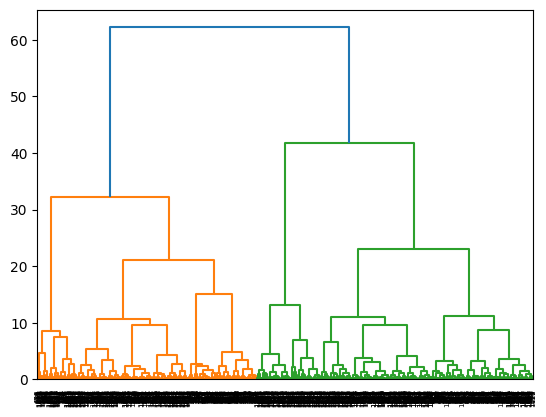

In [13]:
plot_dendrogram(agglomerative)

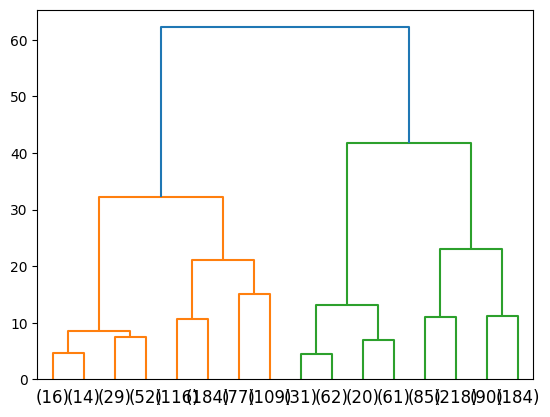

In [14]:
plot_dendrogram(agglomerative, truncate_mode="level", p=3)